In [2]:
from transformers import pipeline

In [3]:
# Initialize the sentiment analysis pipeline
sentiment_pipeline = pipeline("sentiment-analysis")
# Sample data
data = ["I love you", "I hate you"]
# Perform sentiment analysis
results = sentiment_pipeline(data)
print(results)

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

[{'label': 'POSITIVE', 'score': 0.9998656511306763}, {'label': 'NEGATIVE', 'score': 0.9991129040718079}]


In [37]:
import pandas as pd 

mis_df = pd.read_csv('info_trans_with_punctuation_cleaned.csv')
info_df = pd.read_csv('misinfo_trans_with_punctuation_cleaned.csv')

mis_df.head(5)

,ID,transcript_with_punctuation
0,do8O1YxzdVg,"if you don't like eating veggies, this video i..."
1,bpsKYwQffes,"if you are not freezing your rice, this is you..."
2,9RO83PiuQ-A,if you don't like cooking and washing dishes b...
3,dI-Be4IehyQ,"you've heard of sheep pan dinners, but have yo..."
4,O_7ZvwhzqGg,"if you like salads but hate preparing them, th..."


### Clean Data

In [38]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

model_name = "cardiffnlp/twitter-roberta-base-sentiment-latest"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

config.json:   0%|          | 0.00/929 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/501M [00:00<?, ?B/s]

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [39]:
def tokenize_text(text):
  encoded_text = tokenizer(text, return_tensors="pt")  # Convert to PyTorch tensors
  return encoded_text

info_df['encoded_text'] = info_df['transcript_with_punctuation'].apply(tokenize_text)

In [40]:
import torch
def predict_sentiment(encoded_text):
  with torch.no_grad():  # Disable gradient calculation for efficiency
    output = model(**encoded_text)
    predictions = torch.nn.functional.softmax(output.logits, dim=-1)  # Get probabilities
    return predictions[:, 1].item()  # Return probability of positive class

info_df['sentiment'] = info_df['encoded_text'].apply(lambda x: predict_sentiment(x))

In [41]:
info_df

,ID,transcript_with_punctuation,encoded_text,sentiment
0,zqdxQWTdIM4,I'm going to show you the absolute best natura...,"[input_ids, attention_mask]",0.471503
1,aYV9EWaiz_Y,I'm going to give you three tips to help you l...,"[input_ids, attention_mask]",0.382934
2,G4guVvCYAEA,the absolute number one most inflammatory food...,"[input_ids, attention_mask]",0.165083
3,u0-U3-f4VHM,"you know, if you went to your kitchen right no...","[input_ids, attention_mask]",0.416922
4,llDg68l626M,"all right, we're at our favorite restaurant, K...","[input_ids, attention_mask]",0.076333
...,...,...,...,...
1252,3SHtxj9nRpM,here are the top 5 foods to stay away from in ...,"[input_ids, attention_mask]",0.261021
1253,9eeNkQNtfxY,are you looking to improve your diet but don't...,"[input_ids, attention_mask]",0.421491
1254,PdLrENnDPbA,here are five simple steps to help you create ...,"[input_ids, attention_mask]",0.307707
1255,ffF45hF4NV0,"chase your dreams, not excuses. stop making re...","[input_ids, attention_mask]",0.219639


In [42]:
mis_df['encoded_text'] = mis_df['transcript_with_punctuation'].apply(tokenize_text)
mis_df['sentiment'] = mis_df['encoded_text'].apply(lambda x: predict_sentiment(x))
mis_df

,ID,transcript_with_punctuation,encoded_text,sentiment
0,do8O1YxzdVg,"if you don't like eating veggies, this video i...","[input_ids, attention_mask]",0.370416
1,bpsKYwQffes,"if you are not freezing your rice, this is you...","[input_ids, attention_mask]",0.573456
2,9RO83PiuQ-A,if you don't like cooking and washing dishes b...,"[input_ids, attention_mask]",0.313569
3,dI-Be4IehyQ,"you've heard of sheep pan dinners, but have yo...","[input_ids, attention_mask]",0.088705
4,O_7ZvwhzqGg,"if you like salads but hate preparing them, th...","[input_ids, attention_mask]",0.600128
...,...,...,...,...
721,h1HN1mUtlBE,"here's what your favorite foods say about you,...","[input_ids, attention_mask]",0.573707
722,0pCBZYrGWqY,hear my thoughts on nutrition Trends and fads ...,"[input_ids, attention_mask]",0.750411
723,wkvxzcQEXoE,"do you need a super simple, thinner, and I mea...","[input_ids, attention_mask]",0.658251
724,9r3uCzlBHIg,I'm a dietitian and a mom who does baby lead w...,"[input_ids, attention_mask]",0.653318


In [43]:
mis_df['is_informative'] = int(False)
info_df['is_informative'] = int(True)

combined_df = pd.concat([mis_df, info_df], ignore_index=True)
combined_df

,ID,transcript_with_punctuation,encoded_text,sentiment,is_informative
0,do8O1YxzdVg,"if you don't like eating veggies, this video i...","[input_ids, attention_mask]",0.370416,0
1,bpsKYwQffes,"if you are not freezing your rice, this is you...","[input_ids, attention_mask]",0.573456,0
2,9RO83PiuQ-A,if you don't like cooking and washing dishes b...,"[input_ids, attention_mask]",0.313569,0
3,dI-Be4IehyQ,"you've heard of sheep pan dinners, but have yo...","[input_ids, attention_mask]",0.088705,0
4,O_7ZvwhzqGg,"if you like salads but hate preparing them, th...","[input_ids, attention_mask]",0.600128,0
...,...,...,...,...,...
1978,3SHtxj9nRpM,here are the top 5 foods to stay away from in ...,"[input_ids, attention_mask]",0.261021,1
1979,9eeNkQNtfxY,are you looking to improve your diet but don't...,"[input_ids, attention_mask]",0.421491,1
1980,PdLrENnDPbA,here are five simple steps to help you create ...,"[input_ids, attention_mask]",0.307707,1
1981,ffF45hF4NV0,"chase your dreams, not excuses. stop making re...","[input_ids, attention_mask]",0.219639,1


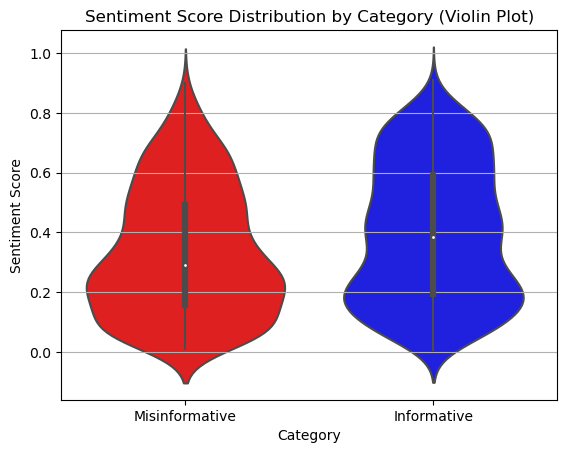

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

palette = ['red', 'blue'] 
sns.violinplot(x = "is_informative", y = "sentiment", showmeans=True, data=combined_df, palette=palette)
plt.xlabel('Category')
plt.ylabel('Sentiment Score')
plt.title('Sentiment Score Distribution by Category (Violin Plot)')
plt.xticks(ticks=[0, 1], labels = ['Misinformative', 'Informative'])
plt.grid(axis='y')
plt.show()

In [47]:
import numpy as np 
from scipy import stats

info_scores = combined_df[combined_df['is_informative'] == 1]['sentiment']
mis_scores = combined_df[combined_df['is_informative'] == 0]['sentiment']

t_statistic, p_value = stats.ttest_ind(info_scores, mis_scores)

# Print the results
print(f"T statistic: {t_statistic:.4f}")
print(f"p-value: {p_value:.4f}")

T statistic: 6.0712
p-value: 0.0000
